<a href="https://colab.research.google.com/github/PriyaP-9704/Machine-Leaning-Workouts/blob/main/Imbalanced_Dataset_Normaliz_%26_standard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [5]:
# to Upload stock market datasets
!pip install yfinance
!pip install pandas
!pip install matplotlib

In [6]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
from datetime import datetime

In [8]:
company = 'AAPL'
stock_data = yf.download(company, start = "2020-01-01")
print(stock_data)

[*********************100%%**********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2020-01-02   74.059998   75.150002   73.797501   75.087502   72.960464   
2020-01-03   74.287498   75.144997   74.125000   74.357498   72.251129   
2020-01-06   73.447502   74.989998   73.187500   74.949997   72.826836   
2020-01-07   74.959999   75.224998   74.370003   74.597504   72.484344   
2020-01-08   74.290001   76.110001   74.290001   75.797501   73.650337   
...                ...         ...         ...         ...         ...   
2024-06-24  207.720001  212.699997  206.589996  208.139999  208.139999   
2024-06-25  209.149994  211.380005  208.610001  209.070007  209.070007   
2024-06-26  211.500000  214.860001  210.639999  213.250000  213.250000   
2024-06-27  214.690002  215.740005  212.350006  214.100006  214.100006   
2024-06-28  215.770004  216.070007  210.300003  210.619995  210.619995   

               Volume  
Date         

In [9]:
df = pd.DataFrame(stock_data)
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,72.960464,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.251129,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,72.826836,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.484344,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.650337,132079200
...,...,...,...,...,...,...
2024-06-24,207.720001,212.699997,206.589996,208.139999,208.139999,80727000
2024-06-25,209.149994,211.380005,208.610001,209.070007,209.070007,56713900
2024-06-26,211.500000,214.860001,210.639999,213.250000,213.250000,66213200


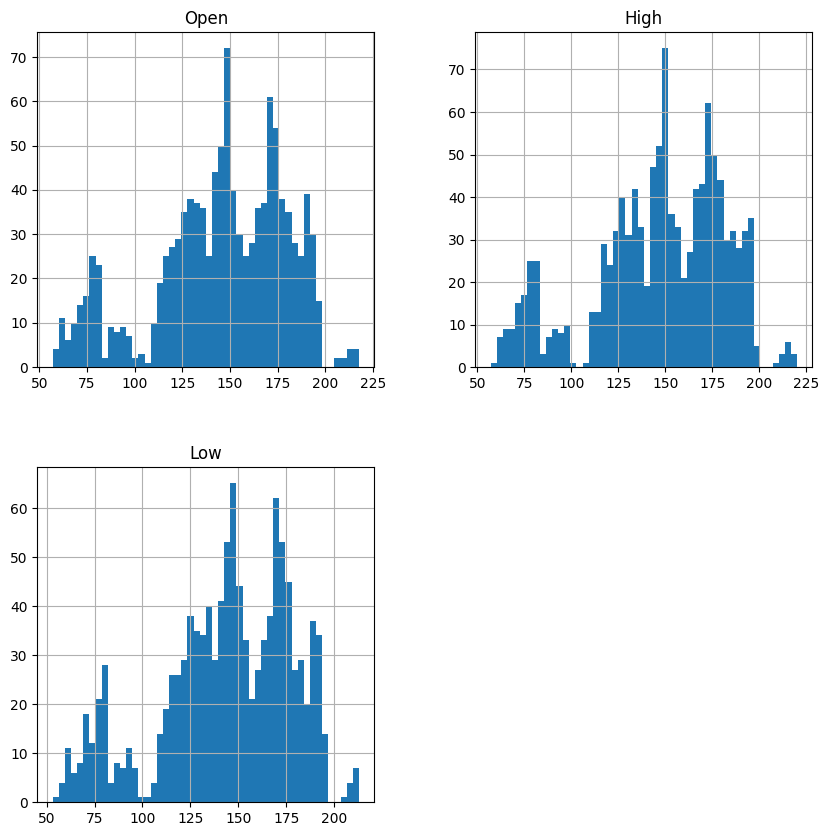

In [10]:
df[['Open','High','Low']].hist(bins=50,figsize =(10,10) )
plt.show()

In [11]:
# Normalization - to scale down a dataset distribution within a scale as (0 to 1)
# It will increase the model effiency

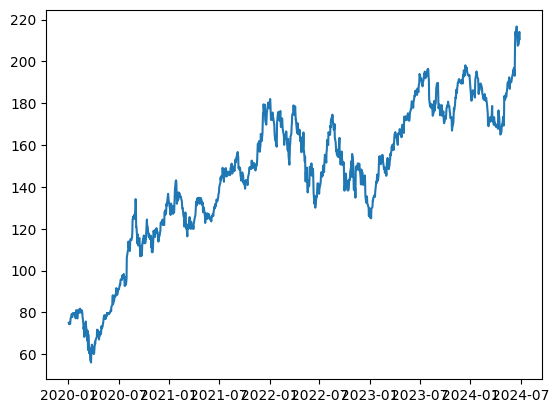

In [12]:
plt.plot(df['Close'])
plt.show()

In [13]:
x = df[['Open','High','Low']].values
x

array([[ 74.05999756,  75.15000153,  73.79750061],
       [ 74.28749847,  75.14499664,  74.125     ],
       [ 73.44750214,  74.98999786,  73.1875    ],
       ...,
       [211.5       , 214.86000061, 210.63999939],
       [214.69000244, 215.74000549, 212.3500061 ],
       [215.77000427, 216.07000732, 210.30000305]])

In [14]:
y = df[['Close']].values

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.2,random_state=2)

In [18]:
model = LinearRegression()

In [19]:
model.fit(x_train,y_train)

LinearRegression()

In [20]:
y_predict = model.predict(x_test)

In [21]:
model.score(x_test,y_test)

0.9988409620397064

In [22]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [23]:
mae = mean_absolute_error(y_test,y_predict)
mse = mean_squared_error(y_test,y_predict)
print("MAE: ",mae, "MSE: ",mse)

MAE:  0.78485855235809 MSE:  1.272774310694702


##Normalization

In [24]:
from sklearn.preprocessing import MinMaxScaler

In [25]:
mms = MinMaxScaler()

In [26]:
x_train_scaled = mms.fit_transform(x_train)
x_test_scaled = mms.fit_transform(x_test)
y_train_scaled = mms.fit_transform(y_train)
y_test_scaled = mms.fit_transform(y_test)

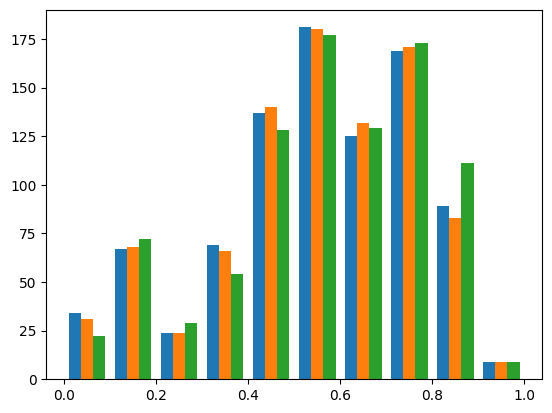

In [27]:
plt.hist(x_train_scaled)
plt.show()

In [28]:
model2 = LinearRegression()

In [29]:
model2.fit(x_train_scaled,y_train_scaled)

LinearRegression()

In [30]:
model2.score(x_test_scaled,y_test_scaled)

0.9961821975378307

In [31]:
# Standardization - when the values are skewed, we can use this

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
scaler = StandardScaler()

In [34]:
x_train_scaled2 = scaler.fit_transform(x_train)
x_test_scaled2 = scaler.fit_transform(x_test)
y_train_scaled2 = scaler.fit_transform(y_train)
y_test_scaled2 = scaler.fit_transform(y_test)

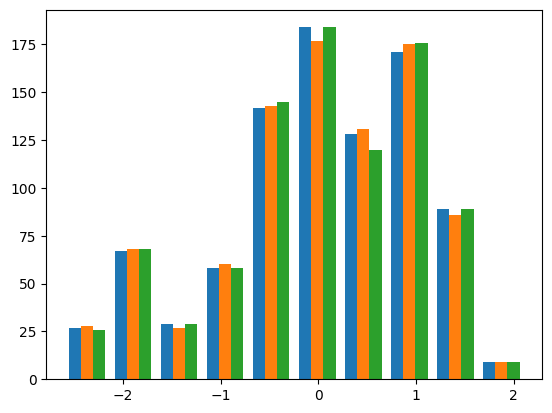

In [36]:
plt.hist(x_train_scaled2)
plt.show()

In [37]:
model3 = LinearRegression()
model3.fit(x_train_scaled2,y_train_scaled2)

LinearRegression()

In [38]:
model3.score(x_test_scaled2,y_test_scaled2)

0.9988592125216235